## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]
mouse_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete.drop_duplicates(subset = ["Mouse ID","Timepoint"])

#print clean Dataframe
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_clean["Tumor Volume (mm3)"].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# group by the drug regimen
grouped_drugs = mouse_data_clean.groupby("Drug Regimen")

# mean of the tumor volume. 
mean = grouped_drugs['Tumor Volume (mm3)'].mean()

#median of the tumor volume. 
median = grouped_drugs['Tumor Volume (mm3)'].median()

#variance of the tumor volume. 
variance = grouped_drugs['Tumor Volume (mm3)'].var()

#Standard deviation of the tumor volume
standard_deviation = grouped_drugs['Tumor Volume (mm3)'].std()

#SEM of the tumor volume
SEM = grouped_drugs['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'tumor volume mean': mean,
              'tumor volume median': median,
              'tumor volume variance': variance,
              'tumor volume standard deviation': standard_deviation,
             'tumor volume SEM': SEM   
              })       

#format columns 
summary_df["tumor volume mean"] = (summary_df["tumor volume mean"]).map("{:.2f}".format)
summary_df["tumor volume median"] = (summary_df["tumor volume median"]).map("{:.2f}".format)
summary_df["tumor volume variance"] = (summary_df["tumor volume variance"]).map("{:.2f}".format)
summary_df["tumor volume standard deviation"] = (summary_df["tumor volume standard deviation"]).map("{:.2f}".format)
summary_df["tumor volume SEM"] = (summary_df["tumor volume SEM"]).map("{:.2f}".format)

#print dataframe
summary_df 

,tumor volume mean,tumor volume median,tumor volume variance,tumor volume standard deviation,tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = grouped_drugs['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])

#print aggregated chart 
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

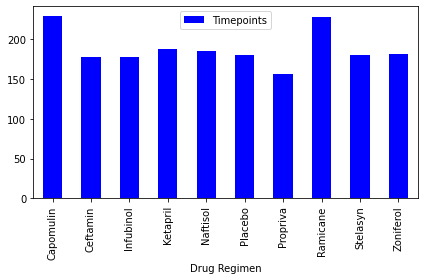

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#xaxis
drug_regimen = grouped_drugs['Timepoint'].count() 

#yaxis
drug_names = grouped_drugs['Drug Regimen'].unique() 

#create dataframe with values to graph 
bar_df = pd.DataFrame({"Timepoints": drug_regimen, "Drug Regimen": drug_names})

#create bar graph 
bar_graph = bar_df.plot.bar(color='blue',width=.5, alpha=1, align="center")

#adjust graoh layout 
plt.tight_layout()

#show graph 
plt.show()   

<BarContainer object of 10 artists>

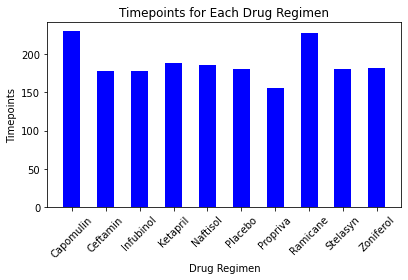

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#count timepoints for each drug regimen
drug_regimen = grouped_drugs['Timepoint'].count() 

# print to find values for yaxis
drug_regimen

#yaxis
timepoints = [230,178,178,188,186,181,156,228,181,182]

#find names of drug regimens to create labels 
drug_names = grouped_drugs['Drug Regimen'].unique() 

#print to find labels for xaxis
drug_names

#xaxis
drugs = np.arange(len(drug_names))

#labels
labels = ['Capomulin', 'Ceftamin', 'Infubinol', "Ketapril", "Naftisol", 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#create xticks
plt.xticks(drugs, labels)

#rotate xticks to fit lables
plt.xticks(rotation = 45)

#add title 
plt.title("Timepoints for Each Drug Regimen")

#label xaxis
plt.xlabel("Drug Regimen")

#lable yaxis
plt.ylabel("Timepoints")

#adjust chart layout 
plt.tight_layout()

#create bar chart 
plt.bar(drugs, timepoints, color='blue',width=.5, alpha=1, align="center")

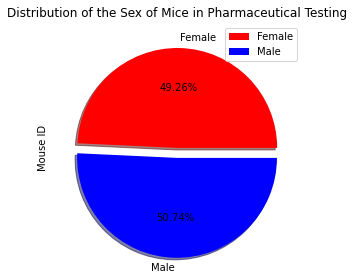

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the DataFrame down only to those columns to chart
mice_sex = mouse_data_clean.groupby(["Sex"]).count()

#make the highest value stand out 
explode = (0, 0.1) 

# The colors of each section of the pie chart
colors = ["red", "blue"] 

#create pie chart 
mouse_piechart = mice_sex.plot.pie(y='Mouse ID', figsize=(4, 4), explode=explode, shadow=True, colors=colors, autopct='%.2f%%')

# Set a title for the chart
plt.title("Distribution of the Sex of Mice in Pharmaceutical Testing")

#adjust chart layout 
plt.tight_layout()

#show chart 
plt.show()

Text(0.5, 1.0, 'Distribution of the Sex of Mice in Pharmaceutical Testing')

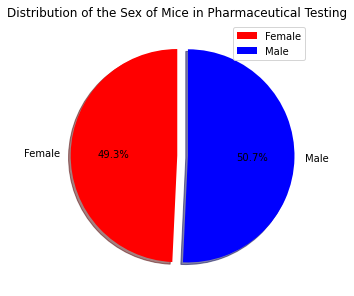

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

#count the number of female mice 
female = mouse_data_clean[mouse_data_clean["Sex"] == "Female"].count()

#print to find number of female mice 
female 

#count the number of male mice 
male = mouse_data_clean[mouse_data_clean["Sex"] == "Male"].count()

#print to find number of male mice 
male

# The values of each section of the pie chart
count = [930, 958] 

# The colors of each section of the pie chart
colors = ["red", "blue"] 

# Tells matplotlib to separate the highest percent from the others
explode = (0, 0.1) 

#create pie chart
plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90) 

#add legend
plt.legend(loc="best")

#adjust chart layout 
plt.tight_layout()

#adds title to pie chart 
plt.title("Distribution of the Sex of Mice in Pharmaceutical Testing") 

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#group by mouse ID
timepoint_groupby = mouse_data_clean.groupby(["Mouse ID"])

#find the max timepoint for the group
greatest_timepoint = timepoint_groupby["Timepoint"].max()

#print max timepoint 
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data_timepoint = pd.merge(mouse_data_clean, greatest_timepoint, how="left", on=["Mouse ID", "Mouse ID"])

#print merged dataset
mouse_data_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#define lower quartile
lowerq = mouse_data_timepoint.quantile(0.25)

#define upper quartile
upperq = mouse_data_timepoint.quantile(0.75)

#Calculate the IQR
iqr = upperq-lowerq

# Locate the rows which contain mice on Capolmulin and get the tumor volumes
Capomulin = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"] == 'Capomulin']
Cap_tumor_vol = Capomulin["Tumor Volume (mm3)"].unique()

# Locate the rows which contain mice on Ramicane and get the tumor volumes
Ramicane = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"] == 'Ramicane']
Ram_tumor_vol = Ramicane["Tumor Volume (mm3)"].unique()

# Locate the rows which contain mice on Infubinol and get the tumor volumes
Infubinol = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"] == 'Infubinol']
Inf_tumor_vol = Infubinol["Tumor Volume (mm3)"].unique()

# Locate the rows which contain mice on Ceftamin and get the tumor volumes
Ceftamin = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"] == 'Ceftamin']
Ceft_tumor_vol = Ceftamin["Tumor Volume (mm3)"].unique() 
     
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Append the resulting final tumor volumes for each drug to the empty list. 
tumor_vol_data.append([Cap_tumor_vol, Ram_tumor_vol, Inf_tumor_vol, Ceft_tumor_vol])

#print list 
tumor_vol_data

[[array([45.        , 43.87849569, 37.61494768, 38.17723195, 36.86687576,
         33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787,
         45.47375302, 39.11389068, 39.77625003, 36.06583471, 36.61712031,
         32.91529186, 30.20682488, 28.16739732, 28.48403281, 41.40859145,
         36.82536664, 35.46461175, 34.2557317 , 33.11875607, 31.75827491,
         30.83435704, 31.3780453 , 28.43096411, 38.79647373, 35.6244027 ,
         32.62300253, 30.48598484, 45.76088647, 46.56841719, 47.21219992,
         40.34394812, 35.50361557, 35.9783344 , 35.45948978, 36.02413752,
         31.02392294, 41.01991315, 41.63001026, 42.28366512, 40.71642815,
         38.9927339 , 35.72602314, 36.3278696 , 31.47541076, 31.8962384 ,
         45.78174579, 39.0054935 , 35.46375763, 36.01558858, 33.89334515,
         32.68065459, 33.06933705, 31.80484133, 32.37735684, 45.62238149,
         46.4145177 , 39.80445341, 38.90934919, 37.69543154, 38.21247939,
         32.56283914, 32.94761484, 33.

/var/folders/lf/_fj3_9ln3j5bmwl546qpzm1w0000gn/T/ipykernel_12447/4100186231.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)
/Users/BronwynsMac/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xi = np.asanyarray(xi)


ValueError: operands could not be broadcast together with shapes (206,) (204,) 

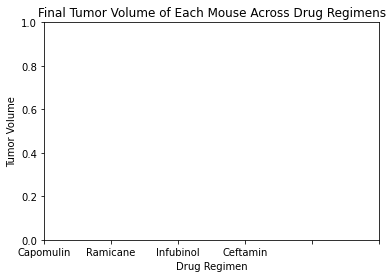

In [137]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#subplots
fig1, ax1 = plt.subplots()

#create xaxis label
ax1.set_xlabel('Drug Regimen')

#create yaxis label
ax1.set_ylabel('Tumor Volume')

#set xtick labels
ax1.set_xticklabels(treatments)

#set title
ax1.set_title('Final Tumor Volume of Each Mouse Across Drug Regimens')

#customize outliers on graph 
flierprops =dict(marker='o', markerfacecolor='orange', markersize=6,
                  linestyle='none')

#create graph 
ax1.boxplot(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = flierprops)

#show graph 
plt.show()

## Line and Scatter Plots

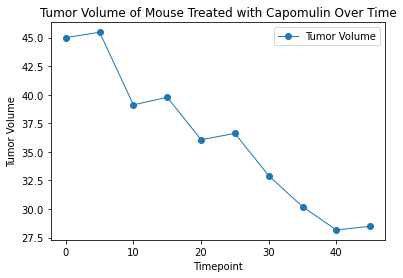

In [110]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin

#filter dataframe to find all the mice treated by Capomulin
capomulin = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == 'Capomulin']

#Find all of the mouse IDs for the mice treated by Capomulin
single_mouse = capomulin.value_counts("Mouse ID")

#print mice IDs to choose a single mouse 
single_mouse

#filter dataframe to by the chosen mouse treated by Capomulin
chosen_mouse = mouse_data_clean.loc[mouse_data_clean["Mouse ID"] == "x401"]

#x-axis 
timepoint = chosen_mouse["Timepoint"]

#y-axis
tumor_volume= chosen_mouse["Tumor Volume (mm3)"]

#create new dataframe to base graph on 
line_df = pd.DataFrame({"Timepoint": timepoint, "Tumor Volume": tumor_volume})

#plot the data in a line graph 
line_chart = line_df.plot(kind = 'line', x = "Timepoint", y = "Tumor Volume", marker="o", linewidth=1,)

#adjust xticks to fit the data better 
plt.xticks(np.arange(min(timepoint), max(timepoint), 10))

#set xlabel
line_chart.set_xlabel("Timepoint")

#set ylabel
line_chart.set_ylabel("Tumor Volume")

#set title
line_chart.set_title("Tumor Volume of Mouse Treated with Capomulin Over Time")

#show the graph
plt.show() 

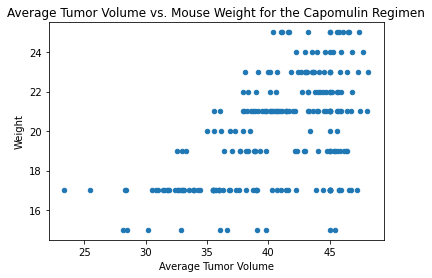

In [119]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#filter dataframe to find all the mice treated by Capomulin
capomulin = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == 'Capomulin']

# #Find the weights for the mice treated by Capomulin
weight= capomulin["Weight (g)"]

#Find the average tumor volume for the mice treated by Capomulin
tumor_volume = capomulin["Tumor Volume (mm3)"]

#create new dataframe to base graph on 
scatter_df = pd.DataFrame({"Average Tumor Volume": tumor_volume, "Weight": weight})

#plot the data in a scatter plot graph 
scatter_chart = scatter_df.plot(kind = 'scatter', x = "Average Tumor Volume", y = "Weight")

#set xlabel
scatter_chart.set_xlabel("Average Tumor Volume")

#set ylabel
scatter_chart.set_ylabel("Weight")

#set title
scatter_chart.set_title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

#show graph
plt.show() 

## Correlation and Regression

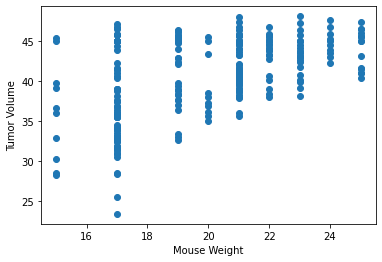

In [138]:
# Calculate the correlation coefficient and linear regression model 

mouse_weight = capomulin.iloc[:,4]
tumor_vol = capomulin.iloc[:,6]
correlation = st.pearsonr(mouse_weight,tumor_vol)

plt.scatter(mouse_weight,tumor_vol)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
